Importações e variáveis usadas

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from bs4 import BeautifulSoup 
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a" 
df = pd.read_html(url)[0] 


Questão 1

In [2]:
print(df.head())

   Unnamed: 0      Country Continent  Year      Status  Life_expectancy  \
0         NaN  Afghanistan      Asia  2015  Developing             65.0   
1         NaN  Afghanistan      Asia  2014  Developing             59.9   
2         NaN  Afghanistan      Asia  2013  Developing             59.9   
3         NaN  Afghanistan      Asia  2012  Developing             59.5   
4         NaN  Afghanistan      Asia  2011  Developing             59.2   

   Adult_Mortality  infant_deaths  Alcohol  percentage_expenditure  ...  \
0              263             62     0.01               71.279624  ...   
1              271             64     0.01               73.523582  ...   
2              268             66     0.01               73.219243  ...   
3              272             69     0.01               78.184215  ...   
4              275             71     0.01                7.097109  ...   

   Polio  Total_expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0             

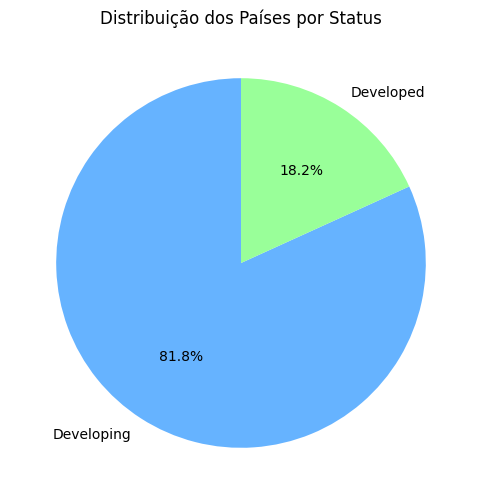

In [3]:
status_counts = df['Status'].value_counts()

plt.figure(figsize=(8, 6))
status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Distribuição dos Países por Status')
plt.ylabel('')
plt.show()

Logo, 18,2% de países desenvolvidos

Questão 2

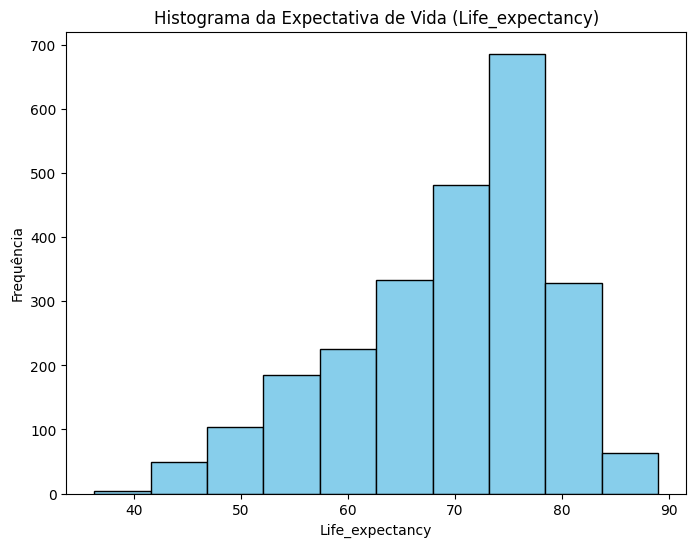

Média: 69.46456724908573; variância: 92.91774400980499


In [4]:
plt.figure(figsize=(8,6))
plt.hist(df['Life_expectancy'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.title('Histograma da Expectativa de Vida (Life_expectancy)')
plt.xlabel('Life_expectancy')
plt.ylabel('Frequência')
plt.show()

media = df['Life_expectancy'].mean()
variancia = df['Life_expectancy'].var()

print(f"Média: {media}; variância: {variancia}")

Segue o histograma. Média: 69,465; variância: 92,918

Questão 3

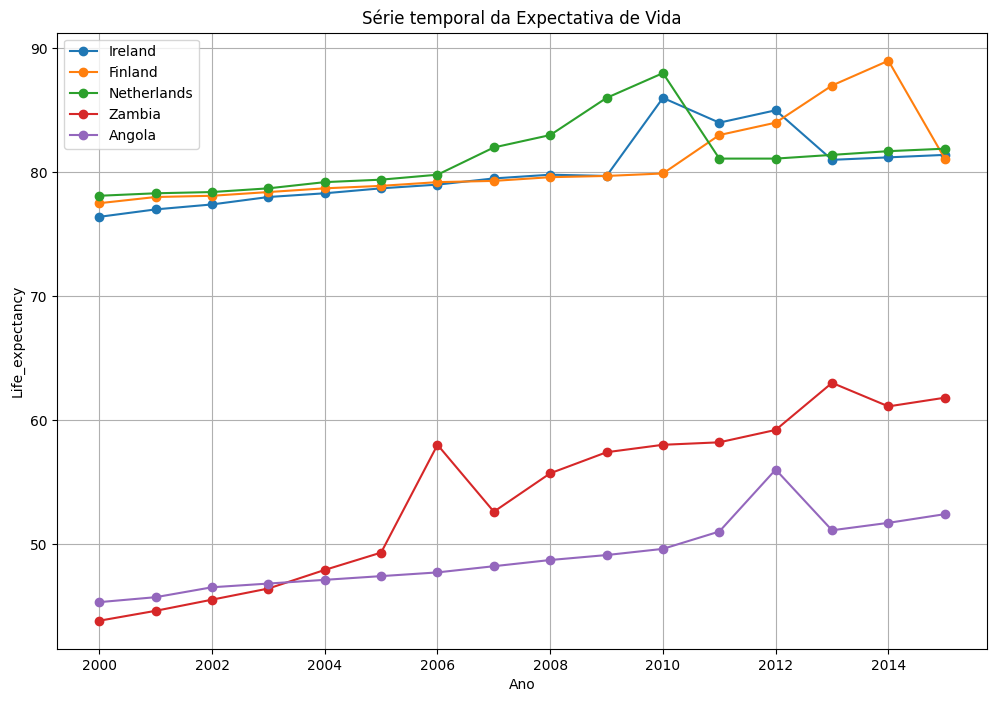

In [5]:
paises = ['Ireland', 'Finland', 'Netherlands', 'Zambia', 'Angola']

df_paises = df[df['Country'].isin(paises)]

plt.figure(figsize=(12, 8))

for pais in paises:
    dados_pais = df_paises[df_paises['Country'] == pais]
    plt.plot(dados_pais['Year'], dados_pais['Life_expectancy'], marker='o', label=pais)

plt.title('Série temporal da Expectativa de Vida')
plt.xlabel('Ano')
plt.ylabel('Life_expectancy')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
df_2014 = df[df['Year'] == 2014]

pais_maior = df_2014.loc[df_2014['Life_expectancy'].idxmax(), 'Country']
maior_valor = df_2014['Life_expectancy'].max()

pais_menor = df_2014.loc[df_2014['Life_expectancy'].idxmin(), 'Country']
menor_valor = df_2014['Life_expectancy'].min()

print(f'País com maior expectativa de vida em 2014: {pais_maior} ({maior_valor})')
print(f'País com menor expectativa de vida em 2014: {pais_menor} ({menor_valor})')

País com maior expectativa de vida em 2014: Belgium (89.0)
País com menor expectativa de vida em 2014: Sierra Leone (48.1)


Questão 4

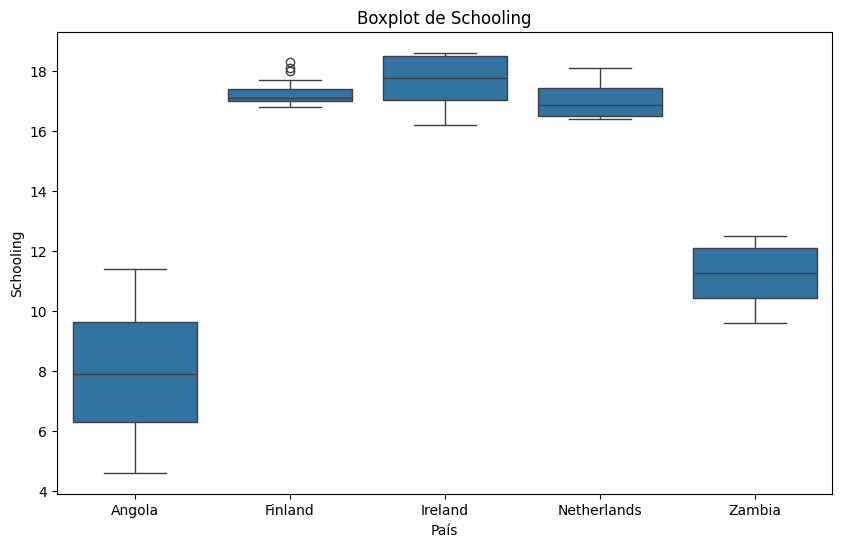

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Country', y='Schooling', data=df_paises)
plt.title('Boxplot de Schooling')
plt.xlabel('País')
plt.ylabel('Schooling')
plt.show()

In [8]:
medianas = df_paises.groupby('Country')['Schooling'].median().sort_values(ascending=False)
print(medianas)

Country
Ireland        17.75
Finland        17.10
Netherlands    16.85
Zambia         11.25
Angola          7.90
Name: Schooling, dtype: float64


Logo, Ireland possuí maior nível de escolaridade de acordo com a mediana

Questão 5

In [14]:
url = "https://www.worldometers.info/world-population/population-by-country/"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/115.0.0.0 Safari/537.36"
}

response = requests.get(url, headers=headers)

print(response.status_code)  # Deve imprimir 200 se deu certo
print(response.text[:500])   # Para ver um pouco do HTML baixado

200
<!DOCTYPE html><html lang="en" dir="ltr"> <head><meta charset="UTF-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta name="viewport" content="width=device-width, initial-scale=1"><title>Population by Country (2025) - Worldometer</title><!-- <I18nTags /> --><script async src="https://www.googletagmanager.com/gtag/js?id=G-ZDP3BFSX60"></script> <script>
    window.dataLayer = window.dataLayer || [];
    function gtag() {
      // eslint-disable-next-line prefer-rest-params
      dataLay


In [19]:
html = response.text
tables = pd.read_html(io.StringIO(html))
df1 = tables[0] 
print(df1.head())

   # Country (or dependency)  Population 2025 Yearly Change    Net Change  \
0  1                   India       1463865525         0.89%      12929734   
1  2                   China       1416096094      â0.23%  â3,225,184   
2  3           United States        347275807         0.54%       1849236   
3  4               Indonesia        285721236         0.79%       2233305   
4  5                Pakistan        255219554         1.57%       3950390   

   Density (P/KmÂ²)  Land Area (KmÂ²) Migrants (net)  Fert. Rate  Median Age  \
0               492           2973190     â495,753        1.94        28.8   
1               151           9388211     â268,126        1.02        40.1   
2                38           9147420        1230663        1.62        38.5   
3               158           1811570      â39,509        2.10        30.4   
4               331            770880   â1,235,336        3.50        20.6   

  Urban Pop % World Share  
0       37.1%      17.78%  


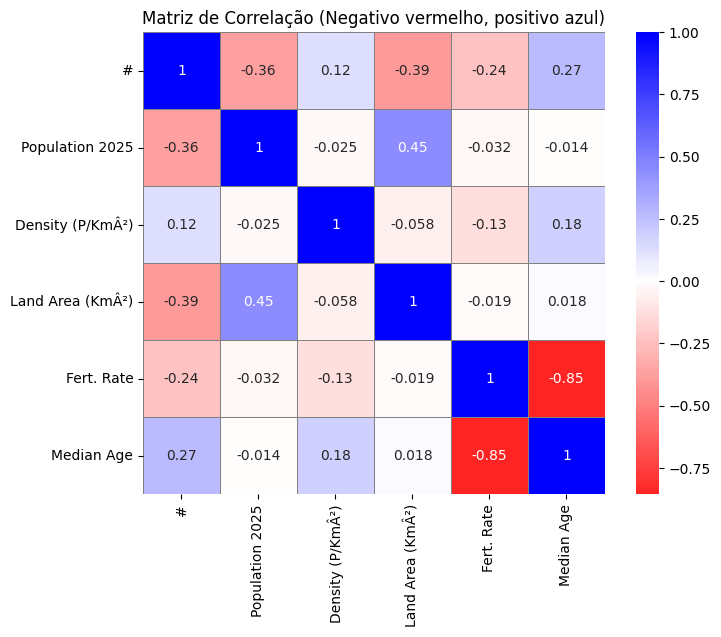

In [30]:
df_numeric = df1.select_dtypes(include='number')

# Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='bwr_r', center=0, square=True, linewidths=0.5, linecolor='gray')
plt.title('Matriz de Correlação (Negativo vermelho, positivo azul)')
plt.show()

Pelo gráfico, percebemos que as variáveis menos correlacionadas são, na ordem:
Population - Median Age, Land Area - Median Age, Fert. Rate - Land Area, Population - Density, Population - Fert. Rate e Density - Land Area